Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat (Links to an external site.)
csv - airline.csv
dat file - airq402.dat
Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt (Links to an external site.)
Dataset:   airq402.dat
Source: U.S. Department of Transportation
Description: Airfsres and passengers for U.S. Domestic Routes for 4th Quarter of 2002.
Variables/Columns
City1   1-3
City2   5-7
Average Fare    11-17
Distance      20-23
Average weekly passengers   26-33
market leading airline    36-37
market share     40-45
Average fare    48-54
Low price airline   57-58
market share    61-66
price     69-75


#### 1.	Import and store the data in a data frame.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [61]:
airdata = pd.read_fwf("airq402.dat",  header=None, names=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','ml_market share','ml_Average fare','Low price airline','lp_market share','lp_price'])
airdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
ml_market share              1000 non-null float64
ml_Average fare              1000 non-null float64
Low price airline            1000 non-null object
lp_market share              1000 non-null float64
lp_price                     1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [62]:
airdata.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,ml_market share,ml_Average fare,Low price airline,lp_market share,lp_price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


#### 2.	Remove the outliers from the data


In [63]:
airdata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City1,1000,90,ATL,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City2,1000,85,TPA,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Fare,1000,NaN,NaN,NaN,163.375,55.3655,50.52,125.975,161.345,197.392,401.23
Distance,1000,NaN,NaN,NaN,1056.97,643.203,108,553.5,919,1452.5,2724
Average weekly passengers,1000,NaN,NaN,NaN,672.279,766.519,181.41,257.197,404.78,769.912,8950.76
market leading airline,1000,16,WN,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ml_market share,1000,NaN,NaN,NaN,60.1286,19.3678,17.68,46.51,59.24,73.51,100
ml_Average fare,1000,NaN,NaN,NaN,166.648,62.6601,50.52,124.085,161.4,202.977,490.03
Low price airline,1000,19,WN,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lp_market share,1000,NaN,NaN,NaN,34.5515,27.097,1.06,13.195,26.14,52.9725,100


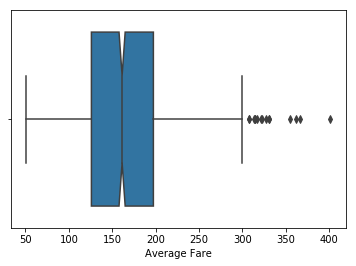

In [64]:
sns.boxplot(x="Average Fare",data=airdata, notch=True, orient="h")

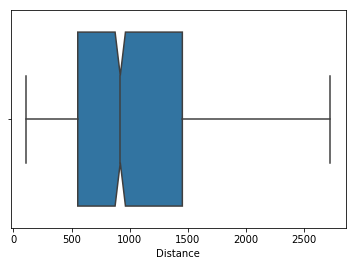

In [65]:
sns.boxplot(x="Distance",data=airdata, notch=True, orient="h")

Finding indices with non-outliers:

        (np.abs(stats.zscore(df)) < 3)

np.abs(stats.zscore(df)) - Calculates the absolute z-score of each value in the column(series), relative to the column mean and standard deviation.

indices < 3, are non_outliers, and rest are ignored for further computing

In [67]:
df = airdata[["Average Fare", "Distance", "Average weekly passengers", "ml_market share", "ml_Average fare", "lp_market share", "lp_price"]]
non_outliers = (np.abs(stats.zscore(df)) < 3)
indices = df[non_outliers.all(axis=1)].index
data = pd.DataFrame(data=df,index=indices)
data.describe()

,Average Fare,Distance,Average weekly passengers,ml_market share,ml_Average fare,lp_market share,lp_price
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,161.170404,1038.634576,591.785839,60.600507,163.874576,34.691884,141.278033
std,51.726169,626.661777,494.415258,19.314748,57.242531,27.273184,43.507866
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,49.610000
25%,125.192500,550.000000,254.400000,47.012500,124.115000,13.097500,113.430000
50%,160.445000,902.000000,391.900000,59.625000,161.220000,26.285000,137.435000
75%,195.142500,1413.750000,717.412500,74.410000,201.200000,53.150000,167.117500
max,321.400000,2724.000000,2885.760000,100.000000,354.080000,100.000000,273.630000


#### 3.	Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

#### 4.	Drop the independent variables which has less than 0.1 correlation with the dependent variable


In [68]:
correlations = data.corr()
correlations

,Average Fare,Distance,Average weekly passengers,ml_market share,ml_Average fare,lp_market share,lp_price
Average Fare,1.000000,0.552015,-0.222121,-0.228129,0.981103,-0.476023,0.859362
Distance,0.552015,1.000000,-0.164635,-0.533325,0.526077,-0.365148,0.557689
Average weekly passengers,-0.222121,-0.164635,1.000000,0.032822,-0.190827,0.078109,-0.254185
ml_market share,-0.228129,-0.533325,0.032822,1.000000,-0.214354,0.298800,-0.314585
ml_Average fare,0.981103,0.526077,-0.190827,-0.214354,1.000000,-0.499622,0.817292
lp_market share,-0.476023,-0.365148,0.078109,0.298800,-0.499622,1.000000,-0.249619
lp_price,0.859362,0.557689,-0.254185,-0.314585,0.817292,-0.249619,1.000000


In [69]:
correlations['Average Fare']

Average Fare                 1.000000
Distance                     0.552015
Average weekly passengers   -0.222121
ml_market share             -0.228129
ml_Average fare              0.981103
lp_market share             -0.476023
lp_price                     0.859362
Name: Average Fare, dtype: float64

#### Considering absolute values > 0.1, for filtering independant variables. 

In [70]:
(abs(data.corr()["Average Fare"]) > 0.1)

Average Fare                 True
Distance                     True
Average weekly passengers    True
ml_market share              True
ml_Average fare              True
lp_market share              True
lp_price                     True
Name: Average Fare, dtype: bool

In [71]:
data.head()

,Average Fare,Distance,Average weekly passengers,ml_market share,ml_Average fare,lp_market share,lp_price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [72]:
y = data.iloc[:,0]
y.head()

0    114.47
1    122.47
2    214.42
3     69.40
4    158.13
Name: Average Fare, dtype: float64

In [73]:
X = data.iloc[:,1:] 
X.head()

,Distance,Average weekly passengers,ml_market share,ml_Average fare,lp_market share,lp_price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


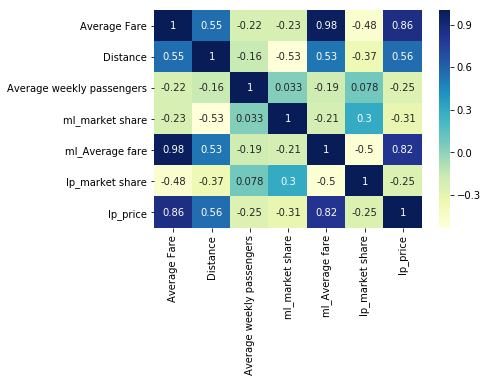

In [74]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

#### 5.	Create scatter Plot of Independent Variable vs Dependent Variable.


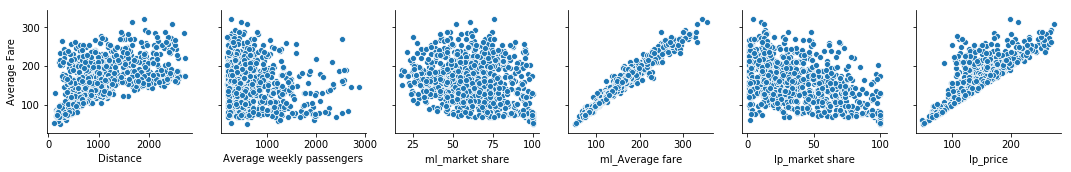

In [76]:
sns.pairplot(data, y_vars="Average Fare", x_vars=["Distance", "Average weekly passengers", "ml_market share", "ml_Average fare", "lp_market share", "lp_price"] )

###### We can observe that 'Average Fare' for the particular route,  has   
* Strong correlation with :
    'Average fare - Market Leading Airline'(positive) and 
    'price - Low price Airline'(positive)  

* Moderate correlation with :
    'Distance' (positive) and
    'market share - Low price Airline' (negative)
     
* Quite weak correlation with:
    'Average weekly passengers' (negative) and
    'market share - Market Leading Airline' (negative)

#### 6. Divide the data set into training and test data set and build a Multiple Linear Regression model.


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### 7.	Print the coefficients & intercepts of the linear regression model

In [79]:
print("Intercept = ", model.intercept_)
print("Coefficients = ", model.coef_)

Intercept =  5.284632850362186
Coefficients =  [ 0.0025005  -0.00179929  0.0762812   0.74000553 -0.03512798  0.21065833]


#### 8.	Print the accuracy of the overall model

In [80]:
print("Train accuracy Score = ", model.score(X_train, y_train))
print("Test accuracy Score = ", model.score(X_test, y_test))

Train accuracy Score =  0.9748579051033945
Test accuracy Score =  0.9694318293725684
